In [1]:
library(base)
library(data.table)
library(tidyverse)
library(dplyr)
#library(devtools)
#library(car)
library(ggpubr)
library(glmnet)
#library(summarytools)
#library(knitr)
#library(htmltools)
#library(corrplot)
library(caret)
library(factoextra)
library(Metrics)
library(readr)
library(gplots)
library(dplyr)
#library(stringr)
library(ROCR)
library(readxl)
library(e1071)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggcorrplot)
library(SciencesPo)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()
Warning message:
“package ‘ggpubr’ was built under R version 3.5.2”Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required pa

In [2]:
# Analysis of the patients 


#Data1 <- read_excel("/Users/laura/Downloads/Golden_Hour/Hazeldine\ et\ al\ Database-Edited-Na-good.xlsx",sheet = "T=<1h", skip = 2) #My data with ISS and NISS
Data1 <- read_excel("/Users/laura/Desktop/FinalHazeldineNaGood.xlsx",sheet = "T=<1h", skip = 2) #My data with ISS and NISS
names(Data1) <- paste0(names(Data1),"_T1")
names(Data1)[1] <- "ID"
Data2 <- read_excel("/Users/laura/Desktop/FinalHazeldineNaGood.xlsx",sheet = "T=4-12h", skip = 2) #My data with ISS and NISS
names(Data2) <- paste0(names(Data2),"_T2")
names(Data2)[1] <- "ID"
Data3 <- read_excel("/Users/laura/Desktop/FinalHazeldineNaGood.xlsx",sheet = "T=48-72h", skip = 2) #My data with ISS and NISS
names(Data3) <- paste0(names(Data3),"_T3")
names(Data3)[1] <- "ID"

s <- inner_join(Data1, Data2,by="ID")
ss <- inner_join(s, Data3,by="ID")

print("All datasets together")

head(ss)

NAscol <- data.frame(colSums(is.na(ss)))
NAscol
NAscol["Names"] <- row.names(NAscol)
maxNa <- dim(ss)[1]*0.3#maximum tolerated of missing values #then check the 0.5 out!!!
deleteCol <- NAscol %>% filter(NAscol$colSums.is.na.ss..>maxNa)

print("Deleted Columns")
print(deleteCol)

ss2 <- ss[,-c(which(names(ss) %in% (as.character(deleteCol$Names))))]



Warning message:
“`chr_along()` is deprecated as of rlang 0.2.0.
This warning is displayed once per session.”

[1] "All datasets together"


ID,MODS_T1,Age_T1,Gender_T1,GCS_T1,ISS_T1,New ISS_T1,Base Excess_T1,Lactate_T1,WBC [109/L]_T1,⋯,nDNA (ng/ml)_T3,mtDNA (ng/ml)_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3
16,Y,82,M,15,38,66,NA,NA,20.43,⋯,NA,NA,386.23,212.94,70.99,16.73,76.21,25.44,51.77,308.5880
45,Y,49,M,3,29,57,-3.9,4.9,4.75,⋯,NA,NA,201.94,37.14,121.85,39.21,72.08,0.01,95.35,122.1423
41,N,38,M,15,10,12,-1.7,3.0,11.54,⋯,NA,NA,1643.40,1353.66,193.49,2100.26,292.98,646.47,1267.07,194.7159
5,Y,19,M,3,21,41,-15.6,14.9,16.62,⋯,NA,NA,3192.48,247.06,758.37,40.36,384.24,29.37,63.75,292.6009
35,Y,20,M,5,34,34,-3.4,3.2,20.06,⋯,NA,NA,196.16,152.93,57.05,16.16,112.15,0.01,57.51,149.7921
25,Y,21,M,4,27,27,-3.8,3.4,21.62,⋯,NA,NA,382.60,218.50,74.62,NA,96.42,1566.01,1351.69,156.1074


,colSums.is.na.ss..
ID,0
MODS_T1,0
Age_T1,0
Gender_T1,0
GCS_T1,0
ISS_T1,5
New ISS_T1,7
Base Excess_T1,4
Lactate_T1,4
WBC [109/L]_T1,2


[1] "Deleted Columns"
   colSums.is.na.ss..            Names
1                  35       IL-6_1S_T1
2                  35       IL-8_1S_T1
3                  35      IL-10_1S_T1
4                  35      TNF-A_1S_T1
5                  35      MCP-1_1S_T1
6                  35      IL-6_10S_T1
7                  35      IL-8_10S_T1
8                  35     IL-10_10S_T1
9                  35     TNF-A_10S_T1
10                 35     MCP-1_10S_T1
11                 37  nDNA (ng/ml)_T1
12                 37 mtDNA (ng/ml)_T1
13                 27       IL-6_1S_T2
14                 27       IL-8_1S_T2
15                 27      IL-10_1S_T2
16                 27      TNF-A_1S_T2
17                 27      MCP-1_1S_T2
18                 27      IL-6_10S_T2
19                 27      IL-8_10S_T2
20                 27     IL-10_10S_T2
21                 27     TNF-A_10S_T2
22                 27     MCP-1_10S_T2
23                 30  nDNA (ng/ml)_T2
24                 30 mtDNA (ng/ml)_T2
25 

In [3]:

#Get TRISS

Bentley180919 <- read_excel("/Users/laura/Desktop/ManuscriptGoldenHour/Bentley180919.xlsx")[1:82,]
names(Bentley180919)[1] <- "ID"
Bentley180919  <- data.frame(apply(Bentley180919, 2, as.numeric))
Bentley <- Bentley180919[,c(1,11,12,13)]

print("TRISS information")
head(Bentley)

dd <- inner_join(Bentley, ss2)
#DeleteOldNISS - plus also gender and others taht might be inetresting too
#Extra <- names(dd)[7:12]
Label <- dd$MODS_T1

names(dd)
names(dd)[c(1,5,7:12,177)]

#dd1 <- dd[,-c(1,5,7:12,177)]#if 0.5 missing values 

dd1 <- dd[,-c(1,5,7:12)]
names(dd1)[3] <- "TRISS"
names(dd1)[4] <- "Age" ##
print("Final non-normlaized dataset")
head(dd1)
########

#scale and imputation 

X_data_numeric <- dd1

table(is.na(X_data_numeric))

for(i in 1:ncol(X_data_numeric)){
  X_data_numeric[is.na(X_data_numeric[,i]), i] <- min(data.matrix(X_data_numeric[,i]), na.rm = TRUE)
    #or median
}

NAscol1 <- data.frame(colSums(is.na(X_data_numeric)))

X_data_scaled <-data.frame(scale(X_data_numeric))

##########

##############
###############
#####################

All2 <- data.frame(X_data_scaled, as.factor(Label))
names(All2) <- c(names(X_data_numeric),"Label")

print("Final normalized and imputed dataset ")
head(All2)
#print(dim(All2))




Warning message in apply(Bentley180919, 2, as.numeric):
“NAs introducidos por coerción”

[1] "TRISS information"


ID,ISS,NISS,ps14
435,11,11,97.21493
339,9,13,99.76171
105,9,22,99.59795
93,14,17,99.10462
41,4,12,99.85114
277,24,34,87.32603


Joining, by = "ID"


[1] "ID"                               "ISS"                             
  [3] "NISS"                             "ps14"                            
  [5] "MODS_T1"                          "Age_T1"                          
  [7] "Gender_T1"                        "GCS_T1"                          
  [9] "ISS_T1"                           "New ISS_T1"                      
 [11] "Base Excess_T1"                   "Lactate_T1"                      
 [13] "WBC [109/L]_T1"                   "NEUT [109/L]_T1"                 
 [15] "LYMPH [109/L]_T1"                 "MONO [109/L]_T1"                 
 [17] "IG [109/L]_T1"                    "NEUT %_T1"                       
 [19] "LYMPH %_T1"                       "MONO %_T1"                       
 [21] "IG %_T1"                          "ROS TO PMA (%)_T1"               
 [23] "ROS TO PMA (MFI)_T1"              "CD62L (MedFI)_T1"                
 [25] "CD88 (MedFI)_T1"                  "CD16 (MedFI)_T1"                 
 [27] "CD11B (MedFI)_T1"                 "CXCR1 (MedFI)_T1"                
 [29] "CXCR2 (MedFI)_T1"                 "CD11B + FMLF (MedFI)_T1"         
 [31] "Increase_CD11b + fMLF (MedFI)_T1" "CD63 (MedFI)_T1"                 
 [33] "CD62L + FMLF (MedFI)_T1"          "Decrease_CD62L + FMLF (MedFI)_T1"
 [35] "% CD16BRIGHT CD62LDIM_T1"         "CD16BRIGHT CD62LDIM [106/L]_T1"  
 [37] "CD16 % +ve_T1"                    "CD16 (MedFI)__1_T1"              
 [39] "% CD14+ 16-_T1"                   "% CD14+ 16+_T1"                  
 [41] "CD14+ 16- (x106/L)_T1"            "CD14+ 16+ (x106/L)_T1"           
 [43] "% HLA-DR +ve_T1"                  "HLA-DR (MedFI)_T1"               
 [45] "% CD14+ HLA-DRLow/Neg_T1"         "CD14+ HLA-DRLow/Neg (x106/L)_T1" 
 [47] "% TLR4 +ve_T1"                    "TLR4 (MedFI)_T1"                 
 [49] "% TLR2 +ve_T1"                    "TLR2 (MedFI)_T1"                 
 [51] "% CD86 +ve_T1"                    "CD86 (MedFI)_T1"                 
 [53] "B cells (x106/L)_T1"              "NK cells (x106/L)_T1"            
 [55] "CD56DIM NK cells (x106/L)_T1"     "CD56BRIGHT NK cells (x106/L)_T1" 
 [57] "NKT cells (x106/L)_T1"            "CD3+ (106/L)_T1"                 
 [59] "CD3+ 4+ (106/L)_T1"               "Term_Helper_T1"                  
 [61] "Naive_Helper_T1"                  "Central_Mem_Helper_T1"           
 [63] "Eff_Mem_Helper_T1"                "CD3+ 8+ (106/L)_T1"              
 [65] "Term_Cyto_T1"                     "Naive_Cyto_T1"                   
 [67] "Central_Mem_Cyto_T1"              "Eff_Mem_Cyto_T1"                 
 [69] "IL1-Ra_T1"                        "IL-6_T1"                         
 [71] "IL-8_T1"                          "IL-10_T1"                        
 [73] "G-CSF_T1"                         "MCP-1_T1"                        
 [75] "TNF-A_T1"                         "Cortisol (ng/ml)_T1"             
 [77] "WBC [109/L]_T2"                   "NEUT [109/L]_T2"                 
 [79] "LYMPH [109/L]_T2"                 "MONO [109/L]_T2"                 
 [81] "IG [109/L]_T2"                    "NEUT %_T2"                       
 [83] "LYMPH %_T2"                       "MONO %_T2"                       
 [85] "IG %_T2"                          "ROS TO PMA (%)_T2"               
 [87] "ROS TO PMA (MFI)_T2"              "CD62L (MedFI)_T2"                
 [89] "CD88 (MedFI)_T2"                  "CD16 (MedFI)_T2"                 
 [91] "CD11B (MedFI)_T2"                 "CXCR1 (MedFI)_T2"                
 [93] "CXCR2 (MedFI)_T2"                 "CD11B + FMLF (MedFI)_T2"         
 [95] "Increase_CD11b + fMLF (MedFI)_T2" "CD63 (MedFI)_T2"                 
 [97] "CD62L + FMLF (MedFI)_T2"          "Decrease_CD62L + FMLF (MedFI)_T2"
 [99] "% CD16BRIGHT CD62LDIM_T2"         "CD16BRIGHT CD62LDIM [106/L]_T2"  
[101] "CD16 % +ve_T2"                    "CD16 (MedFI)__1_T2"              
[103] "% CD14+ 16-_T2"                   "% CD14+ 16+_T2"                  
[105] "CD14+ 16- (x106/L)_T2"            "CD14+ 16

[1] "ID"             "MODS_T1"        "Gender_T1"      "GCS_T1"        
[5] "ISS_T1"         "New ISS_T1"     "Base Excess_T1" "Lactate_T1"    
[9] "% TLR2 +ve_T3"

[1] "Final non-normlaized dataset"


ISS,NISS,TRISS,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,⋯,Central_Mem_Cyto_T3,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3
11,11,97.21493,41,26.16,21.95,1.60,2.58,0.10,83.9,⋯,5,78,NA,NA,NA,NA,NA,NA,NA,180.6876
9,22,99.59795,22,8.28,4.21,3.53,0.33,0.04,50.9,⋯,5,33,237.32,75.04,66.47,59.20,88.73,2.89,39.96,133.6386
14,17,99.10462,47,9.24,4.52,3.73,0.45,0.16,49.0,⋯,NA,NA,179.18,34.76,58.45,171.43,84.37,0.01,85.15,181.1892
4,12,99.85114,38,11.54,6.37,4.18,0.65,0.09,55.2,⋯,27,38,1643.40,1353.66,193.49,2100.26,292.98,646.47,1267.07,194.7159
24,34,87.32603,78,17.43,12.48,3.46,1.10,0.38,71.7,⋯,80,67,NA,NA,NA,NA,NA,NA,NA,259.6209
10,11,98.71743,32,7.74,3.42,3.57,0.53,0.19,44.1,⋯,18,27,96.34,36.02,15.39,9.40,29.34,26.99,46.50,134.9548



FALSE  TRUE 
10319  1637 

[1] "Final normalized and imputed dataset "


ISS,NISS,TRISS,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,⋯,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3,Label
-1.0464636,-1.3838429,0.6694777,0.02292171,2.1290636,2.8295744,-1.3981345,3.7586484,-0.4697766,1.92180514,⋯,0.4253299,-0.4717103,-0.4277698,-0.503151559,-0.19433802,-0.3404883,-0.4272585,-0.30944049,0.2192912,N
-1.1791752,-0.8027674,0.7725172,-0.96101381,-0.9361674,-0.8048849,-0.4411996,-1.1094699,-0.7030714,-0.34092735,⋯,-0.4511945,-0.1280406,-0.2938123,0.073726841,0.01478357,-0.1414413,-0.4152482,-0.21377984,-0.3116227,Y
-0.8473962,-1.0668926,0.7511861,0.33363819,-0.7715913,-0.7413741,-0.3420354,-0.8498369,-0.2364818,-0.47120589,⋯,-0.9576309,-0.2352173,-0.3715281,-0.005590231,0.43054469,-0.1531610,-0.4272585,-0.01629675,0.2249514,N
-1.5109542,-1.3310178,0.7834649,-0.13243653,-0.3772942,-0.3623578,-0.1189158,-0.4171153,-0.5086591,-0.04608645,⋯,-0.3538029,2.4639616,2.1731424,1.329943099,7.57598291,0.4075845,2.2686327,5.14876658,0.3775903,N
-0.1838382,-0.1688669,0.2418910,1.93900666,0.6324491,0.8894205,-0.4759071,0.5565084,0.6189323,1.08527979,⋯,0.2110684,-0.4717103,-0.4277698,-0.503151559,-0.19433802,-0.3404883,-0.4272585,-0.30944049,1.1099962,Y
-1.1128194,-1.3838429,0.7344444,-0.44315301,-1.0287415,-0.9667352,-0.4213667,-0.6767482,-0.1198345,-0.80718738,⋯,-0.5680645,-0.3879266,-0.3690971,-0.431449718,-0.16970279,-0.3010821,-0.3147455,-0.18519963,-0.2967703,N


# Introduce final betas for the three time points here

In [4]:
#Betas_select <- data.frame(All2$TRISS,All2$'MONO %_T1',All2$'Decrease_CD62L + FMLF (MedFI)_T3',All2$'HLA-DR (MedFI)_T3')

#Betas_select <- data.frame(All2$TRISS,All2$'MONO %_T1',All2$'CD63 (MedFI)_T3',All2$'HLA-DR (MedFI)_T3')

Betas_select <- data.frame(All2$NISS,All2$'MONO %_T1',All2$'CD63 (MedFI)_T3',All2$'Decrease_CD62L + FMLF (MedFI)_T3')



Betas_select["Label"]<- All2$Label

names(Betas_select) <- c("NISS","First Time Monocytes %","Third Time CD63 (MedFI)","Third Time Decrease in CD62L after FMLF (MedFI)", "Label")

#names(Betas_select) <- c("TRISS","First Time Monocytes %","Third Time Decrease in CD62L after FMLF (MedFI)","Third Time HLA-DR (MedFI)", "Label")


Betas_select2 <- Betas_select

head(Betas_select2)

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


In [5]:
names(All2)

[1] "ISS"                              "NISS"                            
  [3] "TRISS"                            "Age"                             
  [5] "WBC [109/L]_T1"                   "NEUT [109/L]_T1"                 
  [7] "LYMPH [109/L]_T1"                 "MONO [109/L]_T1"                 
  [9] "IG [109/L]_T1"                    "NEUT %_T1"                       
 [11] "LYMPH %_T1"                       "MONO %_T1"                       
 [13] "IG %_T1"                          "ROS TO PMA (%)_T1"               
 [15] "ROS TO PMA (MFI)_T1"              "CD62L (MedFI)_T1"                
 [17] "CD88 (MedFI)_T1"                  "CD16 (MedFI)_T1"                 
 [19] "CD11B (MedFI)_T1"                 "CXCR1 (MedFI)_T1"                
 [21] "CXCR2 (MedFI)_T1"                 "CD11B + FMLF (MedFI)_T1"         
 [23] "Increase_CD11b + fMLF (MedFI)_T1" "CD63 (MedFI)_T1"                 
 [25] "CD62L + FMLF (MedFI)_T1"          "Decrease_CD62L + FMLF (MedFI)_T1"
 [27] "% CD16BRIGHT CD62LDIM_T1"         "CD16BRIGHT CD62LDIM [106/L]_T1"  
 [29] "CD16 % +ve_T1"                    "CD16 (MedFI)__1_T1"              
 [31] "% CD14+ 16-_T1"                   "% CD14+ 16+_T1"                  
 [33] "CD14+ 16- (x106/L)_T1"            "CD14+ 16+ (x106/L)_T1"           
 [35] "% HLA-DR +ve_T1"                  "HLA-DR (MedFI)_T1"               
 [37] "% CD14+ HLA-DRLow/Neg_T1"         "CD14+ HLA-DRLow/Neg (x106/L)_T1" 
 [39] "% TLR4 +ve_T1"                    "TLR4 (MedFI)_T1"                 
 [41] "% TLR2 +ve_T1"                    "TLR2 (MedFI)_T1"                 
 [43] "% CD86 +ve_T1"                    "CD86 (MedFI)_T1"                 
 [45] "B cells (x106/L)_T1"              "NK cells (x106/L)_T1"            
 [47] "CD56DIM NK cells (x106/L)_T1"     "CD56BRIGHT NK cells (x106/L)_T1" 
 [49] "NKT cells (x106/L)_T1"            "CD3+ (106/L)_T1"                 
 [51] "CD3+ 4+ (106/L)_T1"               "Term_Helper_T1"                  
 [53] "Naive_Helper_T1"                  "Central_Mem_Helper_T1"           
 [55] "Eff_Mem_Helper_T1"                "CD3+ 8+ (106/L)_T1"              
 [57] "Term_Cyto_T1"                     "Naive_Cyto_T1"                   
 [59] "Central_Mem_Cyto_T1"              "Eff_Mem_Cyto_T1"                 
 [61] "IL1-Ra_T1"                        "IL-6_T1"                         
 [63] "IL-8_T1"                          "IL-10_T1"                        
 [65] "G-CSF_T1"                         "MCP-1_T1"                        
 [67] "TNF-A_T1"                         "Cortisol (ng/ml)_T1"             
 [69] "WBC [109/L]_T2"                   "NEUT [109/L]_T2"                 
 [71] "LYMPH [109/L]_T2"                 "MONO [109/L]_T2"                 
 [73] "IG [109/L]_T2"                    "NEUT %_T2"                       
 [75] "LYMPH %_T2"                       "MONO %_T2"                       
 [77] "IG %_T2"                          "ROS TO PMA (%)_T2"               
 [79] "ROS TO PMA (MFI)_T2"              "CD62L (MedFI)_T2"                
 [81] "CD88 (MedFI)_T2"                  "CD16 (MedFI)_T2"                 
 [83] "CD11B (MedFI)_T2"                 "CXCR1 (MedFI)_T2"                
 [85] "CXCR2 (MedFI)_T2"                 "CD11B + FMLF (MedFI)_T2"         
 [87] "Increase_CD11b + fMLF (MedFI)_T2" "CD63 (MedFI)_T2"                 
 [89] "CD62L + FMLF (MedFI)_T2"          "Decrease_CD62L + FMLF (MedFI)_T2"
 [91] "% CD16BRIGHT CD62LDIM_T2"         "CD16BRIGHT CD62LDIM [106/L]_T2"  
 [93] "CD16 % +ve_T2"                    "CD16 (MedFI)__1_T2"              
 [95] "% CD14+ 16-_T2"                   "% CD14+ 16+_T2"                  
 [97] "CD14+ 16- (x106/L)_T2"            "CD14+ 16+ (x106/L)_T2"           
 [99] "% HLA-DR +ve_T2"                  "HLA-DR (MedFI)_T2"               
[101] "% CD14+ HLA-DRLow/Neg_T2"         "CD14+ HLA-DRLow/Neg (x106/L)_T2" 
[103] "% TLR4 +ve_T2"                    "TLR4 (MedFI)_T2"                 
[105] "% TLR2 +ve_T2"                    "TLR2 (Me

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


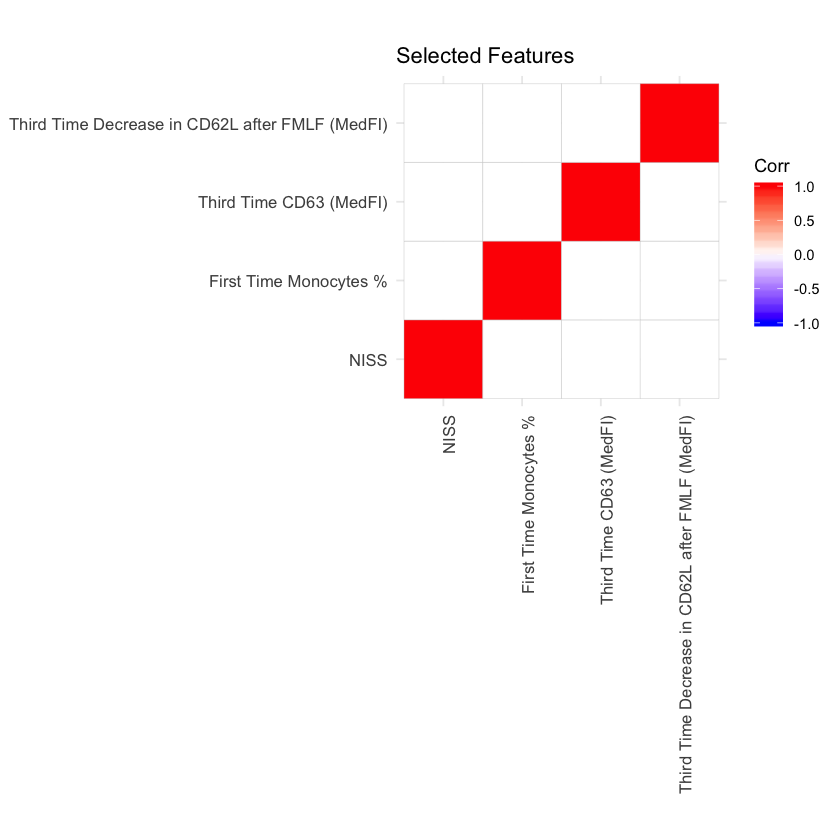

In [6]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))




In [7]:

NumVar <- length(Betas_select)
names <-colnames(Betas_select)
names1 <- as.character(names)

names1 <- strsplit(names1,", ")
names <- as.data.frame(names1)

N <- 1000

multipleAUC<-matrix(rnorm(2),1,N) 
  multipleAUCR<-matrix(rnorm(2),1,N) 
  multipleAUCNB<-matrix(rnorm(2),1,N) 
  multipleAUCNBR<-matrix(rnorm(2),1,N) 
  
  multipleROC<-matrix(as.list(rnorm(2)),1,N)  
  multipleROCR<-matrix(as.list(rnorm(2)),1,N)  
  multipleNBROC<-matrix(as.list(rnorm(2)),1,N) 
  multipleNBROCR<-matrix(as.list(rnorm(2)),1,N) 
  
  singleROC<-list()
  doubleROC<-list()
  singleROCR<-list()
  doubleROCR<-list()
  
  doublePlus<-list()
  singlePlus<-list()
  
  singleAUC<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUC<-matrix(rnorm(2),(NumVar-1),N) 
  singleAUCR<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUCR<-matrix(rnorm(2),(NumVar-1),N)
  
  doubleAUCSVMR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVM<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNBR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNB<-matrix(rnorm(2),(NumVar-1),N) 
  
  MatsingleROC<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatsingleROCR<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatdoubleROC<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  MatdoubleROCR<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  
  MatsinglePlus<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlus<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  MatsinglePlusR<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlusR<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  multiplePlus<-matrix(as.list(rnorm(2)),1,N)
  multiplePlusR<-matrix(as.list(rnorm(2)),1,N)

set.seed(132)

source("/Users/laura/Documents/PhD/R/PipelineAll/FunctionsAUC.R")

print("loaded")

[1] "loaded"


In [8]:
head(Betas_select2)

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


In [9]:
for (j in 1:N){ #N different measurements of AUC values, mean done at the end. 
  
  smp_size <- floor(0.65 * nrow(Betas_select2))
  #set.seed(907)
  train_ind <- sample(seq_len(nrow(Betas_select2)), size = smp_size)
  
  # Training set
  train <- Betas_select2[train_ind, ]
  
  # Test set
  test <- Betas_select2[-train_ind, ]
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]
  
  multipleAUCNB[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUC[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROC[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  
  multipleROC[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  multiplePlus[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  #separate
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUC[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROC[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlus[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROC[,j] <- matrix(singleROC)
  
  
  #Null Hypothesis #### 
  
  
  # Training set
  
  train$Label <- sample(train$Label)
  test$Label <- sample(test$Label)
  #Permuted data, will make sure that are models are really valid as randomizing the label should yield around 0.5 AUC values. The same testing and training arrangements for the real per model are used. 
  
  # Test set
  
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]

  
  multipleAUCNBR[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUCR[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  multiplePlusR[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROCR[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  multipleROCR[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUCR[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROCR[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlusR[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROCR[,j] <- matrix(singleROCR)
  
    print(j)
}

print("done")


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 84
[1] 85
[1] 86
[1] 87
[1] 88


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 139
[1] 140
[1] 141
[1] 142


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 143
[1] 144


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 145
[1] 146
[1] 147
[1] 148
[1] 149
[1] 150
[1] 151
[1] 152
[1] 153
[1] 154
[1] 155
[1] 156
[1] 157
[1] 158
[1] 159
[1] 160
[1] 161
[1] 162
[1] 163
[1] 164
[1] 165
[1] 166
[1] 167
[1] 168
[1] 169
[1] 170
[1] 171
[1] 172
[1] 173
[1] 174
[1] 175
[1] 176
[1] 177
[1] 178
[1] 179
[1] 180
[1] 181
[1] 182
[1] 183
[1] 184
[1] 185
[1] 186
[1] 187
[1] 188
[1] 189
[1] 190
[1] 191
[1] 192
[1] 193
[1] 194
[1] 195
[1] 196
[1] 197
[1] 198
[1] 199
[1] 200
[1] 201
[1] 202
[1] 203
[1] 204
[1] 205
[1] 206
[1] 207


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 208
[1] 209
[1] 210
[1] 211
[1] 212
[1] 213
[1] 214
[1] 215
[1] 216
[1] 217
[1] 218
[1] 219


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 220
[1] 221
[1] 222
[1] 223
[1] 224
[1] 225
[1] 226
[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 236
[1] 237
[1] 238
[1] 239
[1] 240
[1] 241
[1] 242
[1] 243
[1] 244
[1] 245
[1] 246
[1] 247
[1] 248


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 249
[1] 250


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 251
[1] 252
[1] 253
[1] 254
[1] 255
[1] 256
[1] 257
[1] 258
[1] 259
[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 271
[1] 272
[1] 273
[1] 274
[1] 275
[1] 276
[1] 277
[1] 278
[1] 279
[1] 280
[1] 281
[1] 282
[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289
[1] 290
[1] 291
[1] 292
[1] 293
[1] 294
[1] 295
[1] 296
[1] 297
[1] 298
[1] 299
[1] 300
[1] 301
[1] 302
[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319
[1] 320
[1] 321
[1] 322
[1] 323
[1] 324
[1] 325
[1] 326
[1] 327
[1] 328
[1] 329
[1] 330
[1] 331
[1] 332
[1] 333
[1] 334
[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 341
[1] 342
[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349
[1] 350
[1] 351
[1] 352
[1] 353
[1] 354
[1] 355
[1] 356
[1] 357
[1] 358
[1] 359
[1] 360
[1] 361
[1] 362
[1] 363
[1] 364
[1] 365
[1] 366
[1] 367
[1] 368
[1] 369
[1] 370
[1] 371
[1] 372


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 373
[1] 374
[1] 375
[1] 376
[1] 377


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 378
[1] 379
[1] 380
[1] 381
[1] 382
[1] 383
[1] 384
[1] 385
[1] 386
[1] 387
[1] 388
[1] 389


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 390
[1] 391
[1] 392
[1] 393
[1] 394
[1] 395
[1] 396
[1] 397


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 398
[1] 399
[1] 400
[1] 401
[1] 402
[1] 403
[1] 404
[1] 405
[1] 406
[1] 407
[1] 408
[1] 409
[1] 410
[1] 411
[1] 412
[1] 413
[1] 414
[1] 415
[1] 416


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 417
[1] 418
[1] 419
[1] 420


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 421
[1] 422
[1] 423
[1] 424
[1] 425
[1] 426
[1] 427
[1] 428
[1] 429
[1] 430
[1] 431
[1] 432
[1] 433
[1] 434


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 435
[1] 436
[1] 437
[1] 438


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 439
[1] 440
[1] 441
[1] 442
[1] 443
[1] 444
[1] 445
[1] 446
[1] 447
[1] 448
[1] 449
[1] 450
[1] 451
[1] 452
[1] 453
[1] 454
[1] 455
[1] 456


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 457
[1] 458
[1] 459
[1] 460
[1] 461
[1] 462
[1] 463
[1] 464
[1] 465
[1] 466
[1] 467
[1] 468
[1] 469
[1] 470
[1] 471
[1] 472
[1] 473
[1] 474
[1] 475
[1] 476
[1] 477
[1] 478
[1] 479
[1] 480
[1] 481
[1] 482
[1] 483
[1] 484
[1] 485
[1] 486
[1] 487
[1] 488
[1] 489
[1] 490
[1] 491
[1] 492
[1] 493
[1] 494
[1] 495
[1] 496
[1] 497
[1] 498
[1] 499
[1] 500


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 501
[1] 502
[1] 503
[1] 504
[1] 505
[1] 506
[1] 507
[1] 508
[1] 509
[1] 510
[1] 511
[1] 512
[1] 513
[1] 514
[1] 515
[1] 516
[1] 517
[1] 518
[1] 519
[1] 520
[1] 521
[1] 522
[1] 523
[1] 524
[1] 525
[1] 526
[1] 527
[1] 528
[1] 529
[1] 530
[1] 531
[1] 532
[1] 533


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 534
[1] 535
[1] 536
[1] 537
[1] 538
[1] 539
[1] 540
[1] 541
[1] 542
[1] 543


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 544
[1] 545
[1] 546
[1] 547
[1] 548
[1] 549
[1] 550
[1] 551
[1] 552
[1] 553
[1] 554
[1] 555
[1] 556
[1] 557
[1] 558
[1] 559
[1] 560
[1] 561
[1] 562
[1] 563
[1] 564
[1] 565
[1] 566
[1] 567
[1] 568
[1] 569
[1] 570
[1] 571
[1] 572
[1] 573
[1] 574
[1] 575
[1] 576
[1] 577
[1] 578


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 579
[1] 580
[1] 581
[1] 582
[1] 583
[1] 584
[1] 585
[1] 586
[1] 587
[1] 588
[1] 589
[1] 590
[1] 591
[1] 592
[1] 593
[1] 594
[1] 595
[1] 596
[1] 597
[1] 598
[1] 599
[1] 600
[1] 601
[1] 602
[1] 603
[1] 604
[1] 605


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 606
[1] 607
[1] 608
[1] 609
[1] 610
[1] 611
[1] 612
[1] 613
[1] 614
[1] 615
[1] 616
[1] 617
[1] 618
[1] 619
[1] 620
[1] 621
[1] 622


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 623
[1] 624
[1] 625
[1] 626
[1] 627
[1] 628
[1] 629
[1] 630
[1] 631
[1] 632
[1] 633
[1] 634
[1] 635
[1] 636
[1] 637
[1] 638
[1] 639
[1] 640
[1] 641
[1] 642
[1] 643
[1] 644
[1] 645
[1] 646
[1] 647
[1] 648
[1] 649
[1] 650
[1] 651
[1] 652
[1] 653
[1] 654
[1] 655
[1] 656
[1] 657
[1] 658
[1] 659
[1] 660
[1] 661
[1] 662
[1] 663
[1] 664
[1] 665
[1] 666


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 667
[1] 668


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 669
[1] 670
[1] 671
[1] 672
[1] 673
[1] 674
[1] 675
[1] 676
[1] 677
[1] 678
[1] 679
[1] 680
[1] 681
[1] 682
[1] 683
[1] 684
[1] 685
[1] 686
[1] 687
[1] 688
[1] 689
[1] 690
[1] 691
[1] 692
[1] 693
[1] 694
[1] 695
[1] 696
[1] 697
[1] 698
[1] 699
[1] 700
[1] 701
[1] 702
[1] 703
[1] 704
[1] 705
[1] 706
[1] 707
[1] 708
[1] 709
[1] 710
[1] 711
[1] 712
[1] 713
[1] 714
[1] 715
[1] 716
[1] 717
[1] 718
[1] 719
[1] 720
[1] 721
[1] 722
[1] 723
[1] 724
[1] 725
[1] 726
[1] 727
[1] 728
[1] 729
[1] 730
[1] 731
[1] 732
[1] 733
[1] 734
[1] 735
[1] 736
[1] 737
[1] 738
[1] 739
[1] 740
[1] 741
[1] 742
[1] 743
[1] 744
[1] 745
[1] 746
[1] 747
[1] 748
[1] 749
[1] 750


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 751
[1] 752
[1] 753
[1] 754
[1] 755
[1] 756
[1] 757


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 758
[1] 759
[1] 760
[1] 761
[1] 762
[1] 763
[1] 764
[1] 765


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 766
[1] 767
[1] 768
[1] 769
[1] 770
[1] 771
[1] 772
[1] 773
[1] 774
[1] 775
[1] 776
[1] 777
[1] 778
[1] 779
[1] 780
[1] 781
[1] 782
[1] 783
[1] 784
[1] 785
[1] 786
[1] 787
[1] 788
[1] 789
[1] 790
[1] 791
[1] 792
[1] 793
[1] 794
[1] 795
[1] 796
[1] 797
[1] 798
[1] 799
[1] 800
[1] 801
[1] 802
[1] 803
[1] 804
[1] 805
[1] 806
[1] 807
[1] 808
[1] 809
[1] 810
[1] 811
[1] 812
[1] 813
[1] 814
[1] 815
[1] 816
[1] 817
[1] 818


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 819


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 820
[1] 821
[1] 822
[1] 823
[1] 824
[1] 825
[1] 826
[1] 827
[1] 828
[1] 829
[1] 830
[1] 831
[1] 832
[1] 833
[1] 834
[1] 835
[1] 836
[1] 837
[1] 838
[1] 839
[1] 840


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 841
[1] 842
[1] 843
[1] 844
[1] 845


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 846
[1] 847
[1] 848
[1] 849
[1] 850
[1] 851
[1] 852
[1] 853
[1] 854
[1] 855
[1] 856
[1] 857
[1] 858
[1] 859


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 860
[1] 861
[1] 862
[1] 863
[1] 864
[1] 865
[1] 866


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 867
[1] 868
[1] 869
[1] 870
[1] 871
[1] 872
[1] 873


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 874
[1] 875
[1] 876
[1] 877
[1] 878
[1] 879
[1] 880
[1] 881


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 882
[1] 883


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 884
[1] 885
[1] 886
[1] 887
[1] 888
[1] 889
[1] 890
[1] 891


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 892
[1] 893
[1] 894
[1] 895
[1] 896
[1] 897
[1] 898
[1] 899


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 900
[1] 901
[1] 902


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 903
[1] 904
[1] 905
[1] 906
[1] 907
[1] 908
[1] 909
[1] 910
[1] 911
[1] 912
[1] 913
[1] 914
[1] 915
[1] 916
[1] 917
[1] 918


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 919
[1] 920
[1] 921
[1] 922
[1] 923
[1] 924
[1] 925
[1] 926
[1] 927
[1] 928
[1] 929
[1] 930
[1] 931
[1] 932
[1] 933


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 934
[1] 935
[1] 936
[1] 937
[1] 938
[1] 939
[1] 940
[1] 941
[1] 942
[1] 943
[1] 944
[1] 945
[1] 946
[1] 947
[1] 948
[1] 949
[1] 950
[1] 951


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 952
[1] 953
[1] 954
[1] 955
[1] 956
[1] 957
[1] 958
[1] 959
[1] 960
[1] 961
[1] 962
[1] 963
[1] 964
[1] 965
[1] 966
[1] 967
[1] 968
[1] 969
[1] 970
[1] 971
[1] 972
[1] 973
[1] 974
[1] 975
[1] 976
[1] 977
[1] 978
[1] 979
[1] 980
[1] 981
[1] 982
[1] 983
[1] 984
[1] 985
[1] 986


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 987
[1] 988
[1] 989
[1] 990
[1] 991


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 992
[1] 993
[1] 994
[1] 995
[1] 996
[1] 997
[1] 998


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 999
[1] 1000
[1] "done"


In [10]:
#Remember to set something like this woth Folder saying FigAUC

WD <- paste(path.expand("~"), "/Documents/PhD/R/PipelineAll/", sep="")
setwd(WD)

trial <- NULL
test_name <- "Laura"

singleAUC <- as.data.frame(singleAUC)
singleAUC <- mutate(singleAUC, Means=rowMeans(singleAUC))
row.names(singleAUC) <- names(xtrain)

singleAUCR <- as.data.frame(singleAUCR)
singleAUCR <- mutate(singleAUCR, Means=rowMeans(singleAUCR))
row.names(singleAUCR) <- names(xtrain)

multipleAUCR <- as.data.frame(multipleAUCR)
multipleAUCR["Means"] <- rowMeans(as.data.frame(multipleAUCR))

multipleAUC <- as.data.frame(multipleAUC)
multipleAUC["Means"] <- rowMeans(as.data.frame(multipleAUC))

Final <- data.frame(Multi=t(multipleAUC),MultiRand=t(multipleAUCR) )
FinalMeans <- data.frame(Multi=multipleAUC$Means,MultiRand=multipleAUCR$Means )

MonoSingle <- plotAUCSingle(singleAUC, singleAUCR,NumVar,test_name)

names <-names(Betas_select2)
names1 <-as.character(names)
names1 <-strsplit(names1,", ")
names1 <-as.data.frame(names1)

MonoMultiple <- plotAUCMultiple(multipleAUC, multipleAUCR,2,test_name)

Total <- data.frame(Single=singleAUC$Means,SingleRandom=singleAUCR$Means)
m <-length(names)
rownames(Total) <- colnames(Betas_select)[1:(length(names)-1)]

summary(MonoMultiple)
head(singleAUC)
Final


Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

      Mono                  Label     
 Min.   :0.1624   Model        :1000  
 1st Qu.:0.5000   Permuted data:1000  
 Median :0.7794                       
 Mean   :0.7127                       
 3rd Qu.:0.9316                       
 Max.   :1.0000                       

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V992,V993,V994,V995,V996,V997,V998,V999,V1000,Means
NISS,0.8250000,0.6125000,0.6952381,0.7777778,0.7589286,0.7272727,0.6239669,0.8833333,0.6000000,0.6750000,⋯,0.7458333,0.8677686,0.9196429,0.8958333,0.6083333,0.8928571,0.7375000,0.8541667,0.6694215,0.7185895
First Time Monocytes %,0.7833333,0.7458333,0.6714286,0.7777778,0.6919643,0.6033058,0.5661157,0.5500000,0.8125000,0.8083333,⋯,0.6625000,0.5454545,0.5401786,0.8291667,0.7583333,0.6964286,0.6291667,0.6416667,0.6735537,0.7149013
Third Time CD63 (MedFI),0.6333333,0.6750000,0.7904762,0.6666667,0.5446429,0.5537190,0.7603306,0.7666667,0.6416667,0.7833333,⋯,0.5416667,0.7768595,0.7678571,0.6916667,0.7166667,0.7500000,0.6166667,0.6666667,0.6611570,0.7073985
Third Time Decrease in CD62L after FMLF (MedFI),0.7750000,0.7250000,0.7904762,0.5897436,0.7633929,0.8760331,0.6694215,0.5583333,0.6250000,0.6708333,⋯,0.8833333,0.7933884,0.7053571,0.9000000,0.7833333,0.8169643,0.6958333,0.4833333,0.8223140,0.7306279


,Multi,MultiRand
V1,0.9666667,0.4083333
V2,0.9083333,0.6083333
V3,0.9809524,0.4000000
V4,0.9487179,0.6666667
V5,0.9017857,0.5089286
V6,0.9256198,0.6528926
V7,0.9421488,0.4710744
V8,0.9083333,0.5916667
V9,0.9916667,0.3833333
V10,0.9833333,0.6500000


In [11]:
#Plots

MeansMultiple <- FinalMeans
MeansSingle <- Total[,c(1,2)]


colnames(MeansSingle) <- c("Real", "Permuted_Data")
Total <- rbind(MeansSingle, Multivariate=data.frame(Real=MeansMultiple$Multi,Permuted_Data=MeansMultiple$MultiRand))
Total["Names"]<- rownames(Total)

print(Total)

plot1 <- ggplot(Total, aes(y=Names, x=Permuted_Data,xend=Real))+geom_dumbbell(color="cornflowerblue", size=1.5, point.colour.l="goldenrod1")+theme(axis.text.x = element_text(angle = 90), axis.text=element_text(size=14),axis.title=element_text(size=18),strip.text.x = element_text(size = 8, colour = "black"),axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Selected Features")+xlim(0.4,1)
saveRDS(plot1, paste("Results/",test_name, "_Finalplot.rds"))


#multipleAUCR <- singleAUC[4,]
#row.names(multipleAUCR) <- NULL

val <- 2

Meanq <- data.frame(multipleAUC$Means,multipleAUCR$Means)
  MA <- data.frame(Mono=t(multipleAUC[1:dim(multipleAUC)[2]-1]))
 
  MAR<-data.frame(Mono=t(multipleAUCR[1:dim(multipleAUCR)[2]-1]))
 
  MA["Label"]<-as.factor(c(rep("Multivariate model",dim(MA)[1])))
  MAR["Label"]<-as.factor(c(rep("NISS alone",dim(MAR)[1])))
  
  Mono<-rbind(MA,MAR)
  
pp <-ggdensity(Mono, x = "Mono", fill = "Label", palette = "jco")+geom_vline(xintercept=Meanq[1,1],linetype = 2,color="black",show.legend = TRUE)+
    labs(title= paste("AUC Density Plot of GLM Multivariate Model"),y="Density",x="AUC values")+
    geom_text(aes(x=as.numeric(Meanq[1,1]),y=-0.5,label=signif(Meanq[1,1], digits = 2)),size=6.5)+
    geom_text(aes(x=as.numeric(Meanq[1,2]),y=-0.5,label=signif(Meanq[1,2], digits = 2)),size=6.5)
  
plot2 <- pp+geom_vline(xintercept=Meanq[1,2],linetype = 2,color="black",show.legend = TRUE)+theme(axis.text=element_text(size=18),axis.title=element_text(size=18),strip.text.x = element_text(size = 18, colour = "black"),
  axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Density")

pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs1NISS.pdf",width=15, height=5)

save5 <- grid.arrange(arrangeGrob(plot1,plot2, ncol=2), ncol=1)

graphics.off()



                                                     Real Permuted_Data
NISS                                            0.7185895     0.4967129
First Time Monocytes %                          0.7149013     0.5029701
Third Time CD63 (MedFI)                         0.7073985     0.5028364
Third Time Decrease in CD62L after FMLF (MedFI) 0.7306279     0.5018186
Multivariate                                    0.9215896     0.5038352
                                                                                          Names
NISS                                                                                       NISS
First Time Monocytes %                                                   First Time Monocytes %
Third Time CD63 (MedFI)                                                 Third Time CD63 (MedFI)
Third Time Decrease in CD62L after FMLF (MedFI) Third Time Decrease in CD62L after FMLF (MedFI)
Multivariate                                                                       Multi

In [12]:
dd<- data.frame(Random=as.numeric(multipleAUCR[1,]),Normal=as.numeric(multipleAUC[1,]))
ddsd <- format(round(sd(dd$Random), 3), nsmall = 3)
ddsd2 <- format(round(sd(dd$Normal), 3), nsmall = 3)

count2 <- 0
count <- list()
gg <- 0 
ss <- 0


for (i in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
  ss <- ss+1 
  for (j in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
    gg <- gg+1
    if (dd$Random[i] > dd$Normal[j]){
      count2 <- count2 + 1
      
    }
  }
  count[i] <- count2
  count2 <- 0
}

s <- data.frame(table(as.numeric(count)))
pval <- length(s$Var1)/length(as.numeric(singleAUC[4,]))
pval <- format(round(pval, 3), nsmall = 3)

MeansMultiple$Multi <- format(round(as.numeric(MeansMultiple$Multi), 3), nsmall = 3)
MeansMultiple$MultiRand <- format(round(as.numeric(MeansMultiple$MultiRand), 3), nsmall = 3)



FinalVal <- paste(MeansMultiple$Multi,"+/-",ddsd2)
FinalValRand <- paste(MeansMultiple$MultiRand,"+/-",ddsd)
FinalTable<- data.frame(FinalVal,FinalValRand,pval)
rownames(FinalTable) <- c("Multivariate")
names(FinalTable) <- c("  Model AUC    ","  Random Model AUC  ","  p value  ")


mytheme <- gridExtra::ttheme_default(
  core = list(fg_params=list(cex = 1.5)),
  colhead = list(fg_params=list(cex = 1.5)),
  rowhead = list(fg_params=list(cex = 1.5)))

tbl <- tableGrob(FinalTable, theme=mytheme)

pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs2NISS.pdf",width=13, height=6)

grid.arrange(save5, tbl,
             nrow=2,
             as.table=TRUE,
             heights=c(2,1))

graphics.off()

# Introduce the data set time point here to analyze individually

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


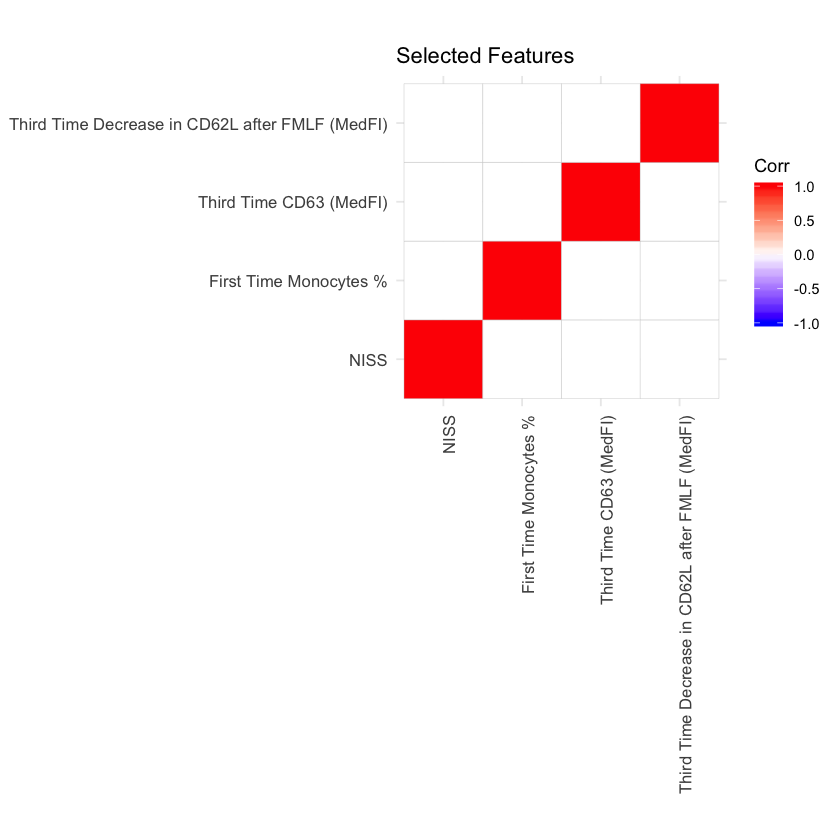

In [13]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))

